# Getting Started with Polars
[polars](https://www.youtube.com/watch?v=CJ0f45evuME&t=11s)

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import plotly.express as px 
import pyarrow

In [2]:
pl.__version__

'0.20.3'

In [10]:
print(dir(pl))

['Array', 'ArrowError', 'Binary', 'Boolean', 'Categorical', 'CategoricalRemappingWarning', 'ChronoFormatWarning', 'ColumnNotFoundError', 'ComputeError', 'Config', 'DATETIME_DTYPES', 'DURATION_DTYPES', 'DataFrame', 'DataType', 'Date', 'Datetime', 'Decimal', 'DuplicateError', 'Duration', 'Enum', 'Expr', 'FLOAT_DTYPES', 'Field', 'Float32', 'Float64', 'INTEGER_DTYPES', 'InProcessQuery', 'Int16', 'Int32', 'Int64', 'Int8', 'InvalidOperationError', 'LazyFrame', 'List', 'NESTED_DTYPES', 'NUMERIC_DTYPES', 'NoDataError', 'Null', 'Object', 'OutOfBoundsError', 'PolarsDataType', 'PolarsPanicError', 'SQLContext', 'SchemaError', 'SchemaFieldNotFoundError', 'Series', 'ShapeError', 'String', 'StringCache', 'Struct', 'StructFieldNotFoundError', 'TEMPORAL_DTYPES', 'Time', 'UInt16', 'UInt32', 'UInt64', 'UInt8', 'Unknown', 'Utf8', '__all__', '__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__register_startup_deps', '__spec__', '__

In [6]:
pl_df = pl.DataFrame(
    {
        "foo": [1, 2, 3],
        "bar": [6, 7, 8],
        "ham": ["a", "b", "c"],
    }
)
pd_df = pl_df.to_pandas()
pd_df

,foo,bar,ham
0,1,6,a
1,2,7,b
2,3,8,c


In [7]:
pl_df2 = pl.from_dataframe(pd_df)
pl_df2

foo,bar,ham
i64,i64,str
1,6,"""a"""
2,7,"""b"""
3,8,"""c"""


## Loading data

In [3]:
ls

mypl.ipynb       pl2023_2024.csv  polars-1.ipynb


In [4]:
ls -l

total 136
-rw-r--r--@ 1 birusod  staff  59063 Jan  3 22:19 mypl.ipynb
-rw-r--r--@ 1 birusod  staff    773 Jan  1 23:23 pl2023_2024.csv
-rw-r--r--@ 1 birusod  staff    582 Jan  3 23:06 polars-1.ipynb


pl.Categorical, pl.Float32, pl.Utf8,  pl.Int64, pl.Date, pl.String

In [2]:
url = 'https://raw.githubusercontent.com/cengel/R-data-wrangling/master/data/MS_trafficstops_bw_age.csv'
df = pl.read_csv(
    url,
    dtypes=[pl.String, pl.Date, pl.String, pl.String, pl.String, pl.String, pl.Date, pl.String, pl.String, pl.Int64, pl.String],
    infer_schema_length=10000,
    ignore_errors = True,
    null_values = list(['NA', '']))

In [23]:
df.head(4)

id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
str,date,str,str,str,str,date,str,str,i64,str
"""MS-2013-00001""",2013-01-01,"""Jones""","""28067""","""Mississippi Hi…","""male""",1950-06-14,"""Black""","""J042""",63,"""Seat belt"""
"""MS-2013-00002""",2013-01-01,"""Lauderdale""","""28075""","""Mississippi Hi…","""male""",1967-04-06,"""Black""","""B026""",46,"""Careless drivi…"
"""MS-2013-00003""",2013-01-01,"""Pike""","""28113""","""Mississippi Hi…","""male""",1974-04-15,"""Black""","""M009""",39,"""Speeding"""
"""MS-2013-00004""",2013-01-01,"""Hancock""","""28045""","""Mississippi Hi…","""male""",1981-03-23,"""White""","""K035""",32,"""Speeding"""


In [24]:
df.shape

(211211, 11)

In [25]:
df.columns

['id',
 'stop_date',
 'county_name',
 'county_fips',
 'police_department',
 'driver_gender',
 'driver_birthdate',
 'driver_race',
 'officer_id',
 'driver_age',
 'violation']

## EDA

In [26]:
df.sample(5).transpose()

column_0,column_1,column_2,column_3,column_4
str,str,str,str,str
"""MS-2015-41113""","""MS-2015-32025""","""MS-2015-08128""","""MS-2014-17788""","""MS-2015-14894"""
"""2015-09-05""","""2015-07-29""","""2015-03-07""","""2014-04-09""","""2015-04-22"""
"""Hinds""","""Bolivar""","""Humphreys""","""Perry""","""Jasper"""
"""28049""","""28011""","""28053""","""28111""","""28061"""
"""Mississippi Hi…","""Mississippi Hi…","""Mississippi Hi…","""Mississippi Hi…","""Mississippi Hi…"
"""female""","""male""","""male""","""female""","""male"""
"""1985-02-08""","""1972-05-02""","""1981-01-08""","""1994-05-23""","""1993-04-26"""
"""Black""","""Black""","""Black""","""White""","""Black"""
"""C056""","""D025""","""B033""","""J042""","""H018"""


In [27]:
df.dtypes

[String,
 Date,
 String,
 String,
 String,
 String,
 Date,
 String,
 String,
 Int64,
 String]

In [90]:
df.describe()

describe,id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
str,str,str,str,str,str,str,str,str,str,f64,str
"""count""","""211211""","""211211""","""211211""","""211211""","""211211""","""211183""","""211102""","""211183""","""211205""",211102.0,"""211211"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""28""","""109""","""28""","""6""",109.0,"""0"""
"""mean""",null,null,null,null,null,null,null,null,null,35.295516,null
"""std""",null,null,null,null,null,null,null,null,null,13.580219,null
"""min""","""MS-2013-00001""","""2013-01-01""","""Adams""","""28001""","""Mississippi Hi…","""female""","""1930-01-11""","""Black""","""A003""",7.0,"""Breaks-Lights-…"
"""25%""",null,null,null,null,null,null,null,null,null,24.0,null
"""50%""",null,null,null,null,null,null,null,null,null,32.0,null
"""75%""",null,null,null,null,null,null,null,null,null,44.0,null
"""max""","""MS-2016-24297""","""2016-07-14""","""Yazoo""","""28163""","""Mississippi Hi…","""male""","""2007-10-21""","""White""","""W300""",86.0,"""Speeding"""


In [3]:
df.select(pl.all().drop_nans()).describe()

describe,id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
str,str,str,str,str,str,str,str,str,str,f64,str
"""count""","""211211""","""211211""","""211211""","""211211""","""211211""","""211183""","""211102""","""211183""","""211205""",211102.0,"""211211"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""28""","""109""","""28""","""6""",109.0,"""0"""
"""mean""",null,null,null,null,null,null,null,null,null,35.295516,null
"""std""",null,null,null,null,null,null,null,null,null,13.580219,null
"""min""","""MS-2013-00001""","""2013-01-01""","""Adams""","""28001""","""Mississippi Hi…","""female""","""1930-01-11""","""Black""","""A003""",7.0,"""Breaks-Lights-…"
"""25%""",null,null,null,null,null,null,null,null,null,24.0,null
"""50%""",null,null,null,null,null,null,null,null,null,32.0,null
"""75%""",null,null,null,null,null,null,null,null,null,44.0,null
"""max""","""MS-2016-24297""","""2016-07-14""","""Yazoo""","""28163""","""Mississippi Hi…","""male""","""2007-10-21""","""White""","""W300""",86.0,"""Speeding"""


### Selecting columns

In [35]:
df.select(pl.col(pl.Int64)).describe()

describe,driver_age
str,f64
"""count""",211102.0
"""null_count""",109.0
"""mean""",35.295516
"""std""",13.580219
"""min""",7.0
"""25%""",24.0
"""50%""",32.0
"""75%""",44.0
"""max""",86.0


In [40]:
df.select('id', pl.col(pl.Date), 'driver_race', 'driver_age').head(3)

id,stop_date,driver_birthdate,driver_race,driver_age
str,date,date,str,i64
"""MS-2013-00001""",2013-01-01,1950-06-14,"""Black""",63
"""MS-2013-00002""",2013-01-01,1967-04-06,"""Black""",46
"""MS-2013-00003""",2013-01-01,1974-04-15,"""Black""",39


In [43]:
df.select(pl.selectors.date()).head(3)

stop_date,driver_birthdate
date,date
2013-01-01,1950-06-14
2013-01-01,1967-04-06
2013-01-01,1974-04-15


In [58]:
df.select(pl.selectors.matches('date'), (pl.selectors.contains('age') | pl.selectors.contains('race'))).head(3)

stop_date,driver_birthdate,driver_age,driver_race
date,date,i64,str
2013-01-01,1950-06-14,63,"""Black"""
2013-01-01,1967-04-06,46,"""Black"""
2013-01-01,1974-04-15,39,"""Black"""


In [60]:
df.select(pl.selectors.starts_with('driver')).head(3)

driver_gender,driver_birthdate,driver_race,driver_age
str,date,str,i64
"""male""",1950-06-14,"""Black""",63
"""male""",1967-04-06,"""Black""",46
"""male""",1974-04-15,"""Black""",39


### Converting Dtypes

In [4]:
drivers_df = df.select(pl.selectors.starts_with('driver'), 'county_fips', 'police_department')
drivers_df.head(2)

driver_gender,driver_birthdate,driver_race,driver_age,county_fips,police_department
str,date,str,i64,str,str
"""male""",1950-06-14,"""Black""",63,"""28067""","""Mississippi Hi…"
"""male""",1967-04-06,"""Black""",46,"""28075""","""Mississippi Hi…"


In [64]:
drivers_df.select(pl.col('driver_age').cast(pl.Float64)).head(3)

driver_age
f64
63.0
46.0
39.0


In [71]:
(drivers_df
    .with_columns(pl.col('county_fips')
    .cast(pl.Int64)
    )
.head(3)
)

driver_gender,driver_birthdate,driver_race,driver_age,county_fips
str,date,str,i64,i64
"""male""",1950-06-14,"""Black""",63,28067
"""male""",1967-04-06,"""Black""",46,28075
"""male""",1974-04-15,"""Black""",39,28113


In [73]:
(drivers_df
    .with_columns(pl.col(['county_fips', 'driver_age'])
    .cast(pl.Float64)
    )
.head(3)
)

driver_gender,driver_birthdate,driver_race,driver_age,county_fips
str,date,str,f64,f64
"""male""",1950-06-14,"""Black""",63.0,28067.0
"""male""",1967-04-06,"""Black""",46.0,28075.0
"""male""",1974-04-15,"""Black""",39.0,28113.0


In [74]:
(drivers_df
    .with_columns([
        pl.col('county_fips').cast(pl.Int64),
        pl.col('driver_age').cast(pl.Float64)
    ])
.head(3)
)

driver_gender,driver_birthdate,driver_race,driver_age,county_fips
str,date,str,f64,i64
"""male""",1950-06-14,"""Black""",63.0,28067
"""male""",1967-04-06,"""Black""",46.0,28075
"""male""",1974-04-15,"""Black""",39.0,28113


### Dropping columns

In [77]:
(drivers_df
    .with_columns(pl.col('driver_age').cast(pl.Float64))
    .drop('county_fips')
.head(3)
)

driver_gender,driver_birthdate,driver_race,driver_age
str,date,str,f64
"""male""",1950-06-14,"""Black""",63.0
"""male""",1967-04-06,"""Black""",46.0
"""male""",1974-04-15,"""Black""",39.0


In [78]:
(drivers_df
    .with_columns(pl.col('driver_age').cast(pl.Float64))
    .drop(['county_fips', 'driver_race'])
.head(3)
)

driver_gender,driver_birthdate,driver_age
str,date,f64
"""male""",1950-06-14,63.0
"""male""",1967-04-06,46.0
"""male""",1974-04-15,39.0


### Renaming columns

In [85]:
drivers_df.rename({"driver_age": "age"}).head(3)

driver_gender,driver_birthdate,driver_race,age,county_fips
str,date,str,i64,str
"""male""",1950-06-14,"""Black""",63,"""28067"""
"""male""",1967-04-06,"""Black""",46,"""28075"""
"""male""",1974-04-15,"""Black""",39,"""28113"""


In [86]:
(
    drivers_df
        .rename({
            "driver_age": "age", 
            "county_fips": "fips"})
        .head(3)
)

driver_gender,driver_birthdate,driver_race,age,fips
str,date,str,i64,str
"""male""",1950-06-14,"""Black""",63,"""28067"""
"""male""",1967-04-06,"""Black""",46,"""28075"""
"""male""",1974-04-15,"""Black""",39,"""28113"""


In [84]:
(
    drivers_df
        .select(
            pl.all().name.map(lambda name: name.upper().replace('DRIVER_', ''))
        )
        .head(3)
)

GENDER,BIRTHDATE,RACE,AGE,COUNTY_FIPS
str,date,str,i64,str
"""male""",1950-06-14,"""Black""",63,"""28067"""
"""male""",1967-04-06,"""Black""",46,"""28075"""
"""male""",1974-04-15,"""Black""",39,"""28113"""


In [29]:
(
    drivers_df
        .with_columns(pl.col('driver_age').cast(pl.Float64))
        .pipe(
            lambda d: d.rename({ col: col.replace('driver_', '').upper() for col in d.columns })
            )
        .head(4)
)

GENDER,BIRTHDATE,RACE,AGE,COUNTY_FIPS,POLICE_DEPARTMENT
str,date,str,f64,str,str
"""male""",1950-06-14,"""Black""",63.0,"""28067""","""Mississippi Hi…"
"""male""",1967-04-06,"""Black""",46.0,"""28075""","""Mississippi Hi…"
"""male""",1974-04-15,"""Black""",39.0,"""28113""","""Mississippi Hi…"
"""male""",1981-03-23,"""White""",32.0,"""28045""","""Mississippi Hi…"


### Splitting column

In [10]:
drivers_df['police_department'][0]

'Mississippi Highway Patrol'

In [15]:
drivers_df['police_department'].str.split(' ').head(3)

police_department
list[str]
"[""Mississippi"", ""Highway"", ""Patrol""]"
"[""Mississippi"", ""Highway"", ""Patrol""]"
"[""Mississippi"", ""Highway"", ""Patrol""]"


In [20]:
drivers_df.state1 = drivers_df['police_department'].str.split(' ')[0]
drivers_df.state1


""
str
"""Mississippi"""
"""Highway"""
"""Patrol"""


In [5]:
drivers_df.state2 = drivers_df['police_department'].str.split(' ').map_elements(lambda vals: vals[0])
type(drivers_df.state2 )

polars.series.series.Series

In [6]:
state_df = drivers_df.with_columns(
    state = pl.col('police_department').str.split(' ').map_elements(lambda vals: vals[0])
)
state_df.head(4)

driver_gender,driver_birthdate,driver_race,driver_age,county_fips,police_department,state
str,date,str,i64,str,str,str
"""male""",1950-06-14,"""Black""",63,"""28067""","""Mississippi Hi…","""Mississippi"""
"""male""",1967-04-06,"""Black""",46,"""28075""","""Mississippi Hi…","""Mississippi"""
"""male""",1974-04-15,"""Black""",39,"""28113""","""Mississippi Hi…","""Mississippi"""
"""male""",1981-03-23,"""White""",32,"""28045""","""Mississippi Hi…","""Mississippi"""


### Working with  Dates: Year - Month - Day

In [92]:
 (df
  .select(pl.selectors.starts_with('driver'), pl.selectors.contains('police'))
  .with_columns(pl.col('driver_birthdate').dt.month().alias('month'))
  .with_columns(pl.col('driver_birthdate').dt.year().alias('year'))
  .with_columns(pl.col('driver_birthdate').dt.day().alias('day'))
  .with_columns(pl.col('driver_birthdate').dt.strftime('%b').alias('month_abbr'))
  .with_columns(pl.col('driver_birthdate').dt.strftime('%a').alias('day_abbr'))
  .head(4)
 )

driver_gender,driver_birthdate,driver_race,driver_age,police_department,month,year,day,month_abbr,day_abbr
str,date,str,i64,str,i8,i32,i8,str,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",6,1950,14,"""Jun""","""Wed"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",4,1967,6,"""Apr""","""Thu"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",4,1974,15,"""Apr""","""Mon"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",3,1981,23,"""Mar""","""Mon"""


In [5]:
month_df =  (df
  .select(pl.selectors.starts_with('driver'), pl.selectors.contains('police'))
  .with_columns(
    pl.col('driver_birthdate').dt.year().alias('year'), 
    pl.col('driver_birthdate').dt.strftime('%B').alias('monthname'),
    pl.col('driver_birthdate').dt.strftime('%A').alias('dayname'),
    pl.col('driver_gender').cast(pl.Categorical).alias('gender'))
)
month_df.head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


### Categoricals: ordering

In [8]:
import calendar
days = list(calendar.day_name)
days


['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [11]:
custom_order = ["male", "female"]

In [12]:
with pl.StringCache():
    pl.Series(custom_order).cast(pl.Categorical)
    month_df2 = month_df.with_columns(pl.col('gender').cast(pl.Categorical))

In [10]:
with pl.StringCache():
    pl.Series(days).cast(pl.Categorical)
    month_df2 = month_df.with_columns(pl.col('dayname').cast(pl.Categorical('physical')))

In [13]:
month_df2.head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


In [ ]:
# df.to_pandas()
# column_values_with_custom_order = ["B", "A", "C"] 
# df["Column"] = pd.Categorical(df.Column, categories=column_values_with_custom_order, ordered=True)
# pl.from_pandas(df)

##  Wrangling verbs

### Select

In [34]:
month_df[0:3, 0:3]

driver_gender,driver_birthdate,driver_race
str,date,str
"""male""",1950-06-14,"""Black"""
"""male""",1967-04-06,"""Black"""
"""male""",1974-04-15,"""Black"""


In [35]:
month_df[0:3, 'driver_gender':'driver_race']

driver_gender,driver_birthdate,driver_race
str,date,str
"""male""",1950-06-14,"""Black"""
"""male""",1967-04-06,"""Black"""
"""male""",1974-04-15,"""Black"""


In [37]:
month_df[0:3, ['driver_gender', 'driver_race', 'driver_age', 'driver_birthdate']]

driver_gender,driver_race,driver_age,driver_birthdate
str,str,i64,date
"""male""","""Black""",63,1950-06-14
"""male""","""Black""",46,1967-04-06
"""male""","""Black""",39,1974-04-15


In [49]:
month_df.select(pl.selectors.categorical(), pl.selectors.date()).head()

gender,driver_birthdate
cat,date
"""male""",1950-06-14
"""male""",1967-04-06
"""male""",1974-04-15
"""male""",1981-03-23
"""male""",1992-08-03


In [50]:
month_df.select(pl.selectors.contains("gender")).head(4)

driver_gender,gender
str,cat
"""male""","""male"""
"""male""","""male"""
"""male""","""male"""
"""male""","""male"""


In [51]:
month_df.select(~pl.selectors.contains("gender")).head(4)

driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname
date,str,i64,str,i32,str,str
1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday"""
1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday"""
1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday"""
1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday"""


In [52]:
month_df.select(~pl.selectors.starts_with("driver")).head(4)

police_department,year,monthname,dayname,gender
str,i32,str,str,cat
"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


In [59]:
month_df.select(pl.selectors.ends_with("name") | pl.selectors.starts_with("police")).head(4)

monthname,dayname,police_department
str,str,str
"""June""","""Wednesday""","""Mississippi Hi…"
"""April""","""Thursday""","""Mississippi Hi…"
"""April""","""Monday""","""Mississippi Hi…"
"""March""","""Monday""","""Mississippi Hi…"


In [71]:
month_df.select(pl.selectors.starts_with("driver") | pl.selectors.string()).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,monthname,dayname
str,date,str,i64,str,str,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…","""June""","""Wednesday"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…","""April""","""Thursday"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…","""April""","""Monday"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…","""March""","""Monday"""


In [72]:
month_df.select(pl.selectors.starts_with("driver") , pl.selectors.categorical()).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,gender
str,date,str,i64,cat
"""male""",1950-06-14,"""Black""",63,"""male"""
"""male""",1967-04-06,"""Black""",46,"""male"""
"""male""",1974-04-15,"""Black""",39,"""male"""
"""male""",1981-03-23,"""White""",32,"""male"""


In [69]:
month_df.select(pl.selectors.starts_with("driver") & pl.selectors.string()).head(4)

driver_gender,driver_race
str,str
"""male""","""Black"""
"""male""","""Black"""
"""male""","""Black"""
"""male""","""White"""


In [39]:
month_df.select('driver_gender', 'driver_race', 'driver_age', 'driver_birthdate').head(3)

driver_gender,driver_race,driver_age,driver_birthdate
str,str,i64,date
"""male""","""Black""",63,1950-06-14
"""male""","""Black""",46,1967-04-06
"""male""","""Black""",39,1974-04-15


### Filter

In [74]:
month_df.filter(gender = 'male').head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


In [75]:
month_df.filter(gender = 'male', dayname = 'Monday').head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""
"""male""",1992-08-03,"""White""",20,"""Mississippi Hi…",1992,"""August""","""Monday""","""male"""
"""male""",1966-09-19,"""White""",46,"""Mississippi Hi…",1966,"""September""","""Monday""","""male"""


In [118]:
month_df.filter(pl.col('dayname').is_in(['Friday', 'Sunday'])).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1978-10-27,"""White""",34,"""Mississippi Hi…",1978,"""October""","""Friday""","""male"""
"""male""",1978-10-27,"""White""",34,"""Mississippi Hi…",1978,"""October""","""Friday""","""male"""
"""male""",1942-02-22,"""Black""",71,"""Mississippi Hi…",1942,"""February""","""Sunday""","""male"""
"""male""",1958-09-21,"""White""",54,"""Mississippi Hi…",1958,"""September""","""Sunday""","""male"""


In [119]:
month_df.filter(~pl.col('dayname').is_in(['Friday', 'Sunday'])).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


In [80]:
month_df.filter(pl.col('gender') == 'male', dayname = 'Monday').head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""
"""male""",1992-08-03,"""White""",20,"""Mississippi Hi…",1992,"""August""","""Monday""","""male"""
"""male""",1966-09-19,"""White""",46,"""Mississippi Hi…",1966,"""September""","""Monday""","""male"""


In [91]:
month_df.filter(gender = 'male', dayname = 'Monday', year = 1950).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-08-21,"""White""",62,"""Mississippi Hi…",1950,"""August""","""Monday""","""male"""
"""male""",1950-03-06,"""White""",63,"""Mississippi Hi…",1950,"""March""","""Monday""","""male"""
"""male""",1950-08-14,"""White""",63,"""Mississippi Hi…",1950,"""August""","""Monday""","""male"""
"""male""",1950-04-17,"""White""",63,"""Mississippi Hi…",1950,"""April""","""Monday""","""male"""


In [93]:
month_df.filter((pl.col('driver_race') == 'Black') | (pl.col('dayname') == 'Monday')).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male"""


In [94]:
month_df.filter((pl.col('driver_race') == 'Black') , (pl.col('dayname') == 'Monday')).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""female""",1974-05-13,"""Black""",39,"""Mississippi Hi…",1974,"""May""","""Monday""","""female"""
"""male""",1981-02-02,"""Black""",32,"""Mississippi Hi…",1981,"""February""","""Monday""","""male"""
"""female""",1970-09-14,"""Black""",42,"""Mississippi Hi…",1970,"""September""","""Monday""","""female"""


In [95]:
month_df.filter((pl.col('driver_race') == 'Black') & (pl.col('dayname') == 'Monday')).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""female""",1974-05-13,"""Black""",39,"""Mississippi Hi…",1974,"""May""","""Monday""","""female"""
"""male""",1981-02-02,"""Black""",32,"""Mississippi Hi…",1981,"""February""","""Monday""","""male"""
"""female""",1970-09-14,"""Black""",42,"""Mississippi Hi…",1970,"""September""","""Monday""","""female"""


In [97]:
month_df.filter(
    (pl.col('driver_race') == 'Black') & 
    (pl.col('dayname').is_in( ['Monday' ,'Sunday']))
    ).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender
str,date,str,i64,str,i32,str,str,cat
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male"""
"""male""",1942-02-22,"""Black""",71,"""Mississippi Hi…",1942,"""February""","""Sunday""","""male"""
"""female""",1974-05-13,"""Black""",39,"""Mississippi Hi…",1974,"""May""","""Monday""","""female"""
"""male""",1981-02-02,"""Black""",32,"""Mississippi Hi…",1981,"""February""","""Monday""","""male"""


### Compute   with select

In [112]:
month_df.select([
    pl.col('driver_age').min().alias('min_age'),
    pl.col('driver_age').median().round().alias('med_age'),
    pl.col('driver_age').mean().round(3).alias('mean_age'),
    pl.col('driver_age').std().round(1).alias('std_age'),
    pl.col('driver_age').max().alias('max_age')
])

min_age,med_age,mean_age,std_age,max_age
i64,f64,f64,f64,i64
7,32.0,35.296,13.6,86


In [122]:
month_df.select('driver_age').describe()

describe,driver_age
str,f64
"""count""",211102.0
"""null_count""",109.0
"""mean""",35.295516
"""std""",13.580219
"""min""",7.0
"""25%""",24.0
"""50%""",32.0
"""75%""",44.0
"""max""",86.0


array([[<Axes: title={'center': 'driver_age'}>]], dtype=object)

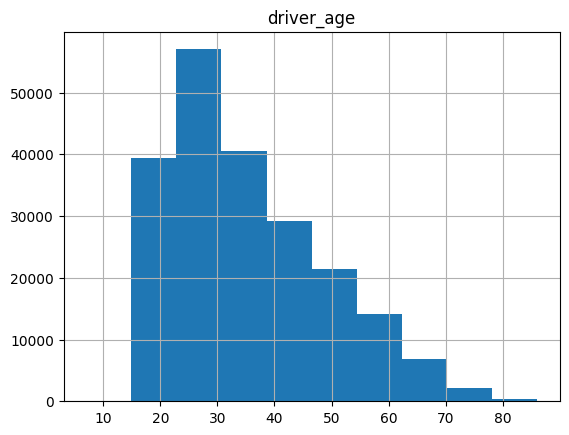

In [14]:
month_df.select('driver_age').to_pandas().hist()

<Axes: xlabel='driver_age', ylabel='Count'>

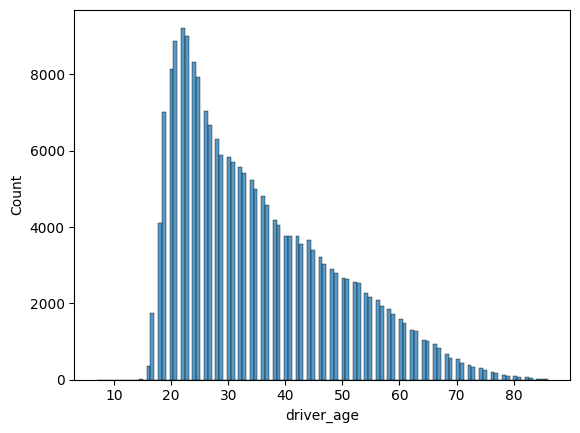

In [15]:
sns.histplot(data=month_df, x="driver_age")

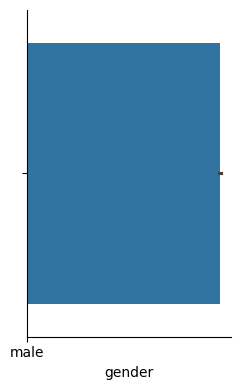

In [18]:
sns.catplot(
    data=month_df, x="gender",
    kind="bar", height=4, aspect=.6,
)

<Axes: xlabel='dayname', ylabel='count'>

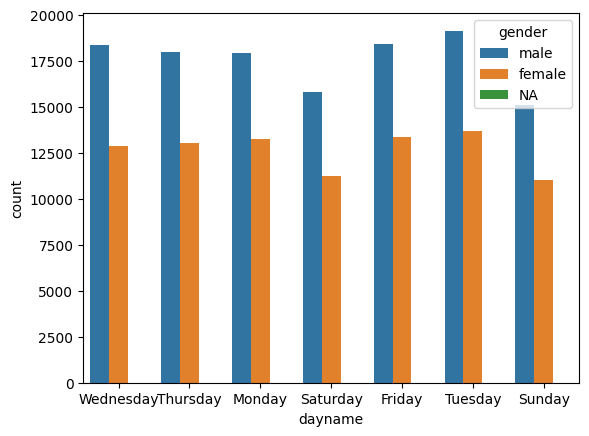

In [44]:
sns.countplot(month_df2, x="dayname", hue="gender")

### Mutate

In [47]:
month_df2.with_columns(
    (pl.col('driver_age') * 12).alias('age_in_months')
).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,age_in_months
str,date,str,i64,str,i32,str,cat,cat,i64
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""",756
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""",552
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""",468
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""",384


In [53]:
month_df2.with_columns(
    ('race_' + pl.col('driver_race')).alias('race')
).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,race
str,date,str,i64,str,i32,str,cat,cat,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""","""race_Black"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""","""race_Black"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""","""race_Black"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""","""race_White"""


In [58]:

month_df2.with_columns(
    pl.col('driver_birthdate').dt.strftime('%b').alias('month'),
    pl.col('driver_birthdate').dt.day().cast(pl.String()).alias('day')
).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,month,day
str,date,str,i64,str,i32,str,cat,cat,str,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""","""Jun""","""14"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""","""Apr""","""6"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""","""Apr""","""15"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""","""Mar""","""23"""


In [68]:
month_df2.with_columns(
    pl.col('driver_birthdate').dt.strftime('%b-%d').alias('m-day')
    ).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,m-day
str,date,str,i64,str,i32,str,cat,cat,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""","""Jun-14"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""","""Apr-06"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""","""Apr-15"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""","""Mar-23"""


In [67]:
month_df2.with_columns(
    (pl.col('driver_birthdate').dt.strftime('%b') + '_' + 
    pl.col('driver_birthdate').dt.day().cast(pl.String())).alias('m_day')
).head(4)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,m_day
str,date,str,i64,str,i32,str,cat,cat,str
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""","""Jun_14"""
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""","""Apr_6"""
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""","""Apr_15"""
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""","""Mar_23"""


In [81]:
(month_df
    .with_columns(pl.col("driver_age").mean().over('driver_race').alias('mean_age'))
    .head(4)
)

driver_gender,driver_birthdate,driver_race,driver_age,police_department,year,monthname,dayname,gender,mean_age
str,date,str,i64,str,i32,str,str,cat,f64
"""male""",1950-06-14,"""Black""",63,"""Mississippi Hi…",1950,"""June""","""Wednesday""","""male""",34.248504
"""male""",1967-04-06,"""Black""",46,"""Mississippi Hi…",1967,"""April""","""Thursday""","""male""",34.248504
"""male""",1974-04-15,"""Black""",39,"""Mississippi Hi…",1974,"""April""","""Monday""","""male""",34.248504
"""male""",1981-03-23,"""White""",32,"""Mississippi Hi…",1981,"""March""","""Monday""","""male""",36.213997


### Grouping: count

In [14]:
mdf = month_df.filter(
    ~pl.col('driver_race').is_in(['NA']),
    ~pl.col('driver_gender').is_in(['NA'])
    )

In [15]:
mdf.group_by('driver_race').agg(pl.count())

driver_race,count
str,u32
"""White""",112522
"""Black""",98661


In [16]:
mdf.group_by('gender').agg(pl.count())

gender,count
cat,u32
"""male""",122743
"""female""",88440


In [124]:
mdf.group_by('gender').agg(pl.count()).to_pandas()

,gender,count
0,female,88440
1,male,122743


<Axes: xlabel='driver_gender', ylabel='count'>

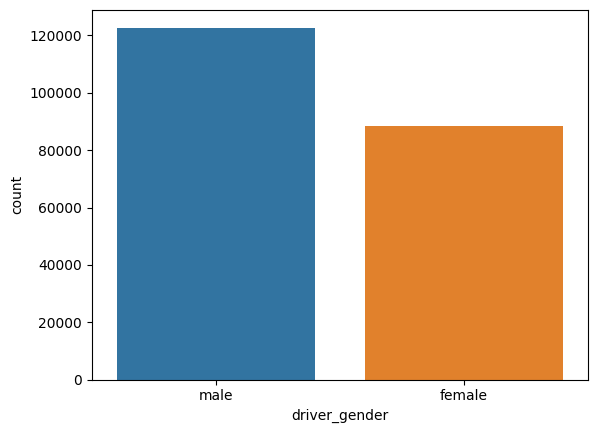

In [19]:
sns.barplot(
    data = mdf.group_by('driver_gender').agg(pl.count()).to_pandas(),
    x = 'driver_gender', hue = 'driver_gender',
    y = 'count')

<Axes: xlabel='gender', ylabel='count'>

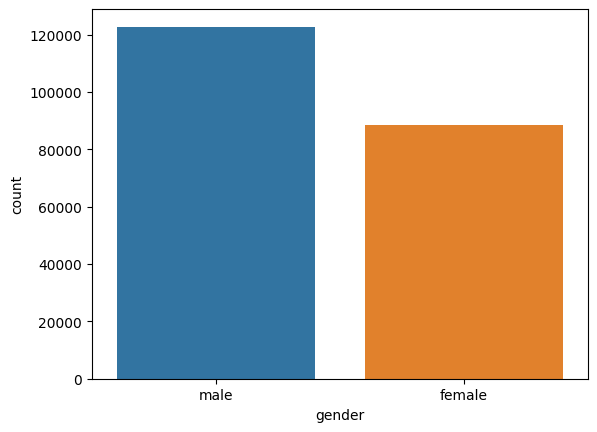

In [20]:
sns.barplot(
    data = mdf.group_by('gender').agg(pl.count()).to_pandas(),
    x = 'gender', hue = 'gender',
    y = 'count')

<Axes: xlabel='driver_gender', ylabel='count'>

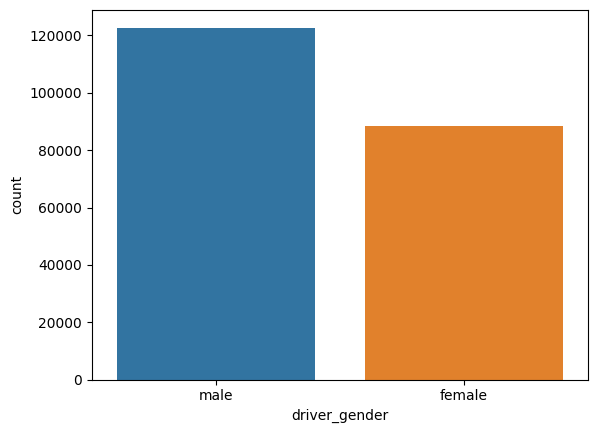

In [21]:
sns.barplot(
    data = mdf.group_by('driver_gender').agg(pl.count()),
    x = 'driver_gender', hue = 'driver_gender',
    y = 'count')

<Axes: xlabel='gender', ylabel='count'>

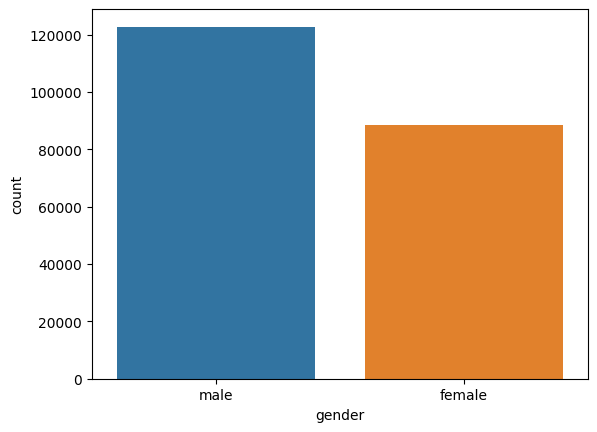

In [22]:
sns.barplot(
    data = mdf.group_by('gender').agg(pl.count()),
    x = 'gender', hue = 'gender',
    y = 'count')

<Axes: xlabel='gender', ylabel='count'>

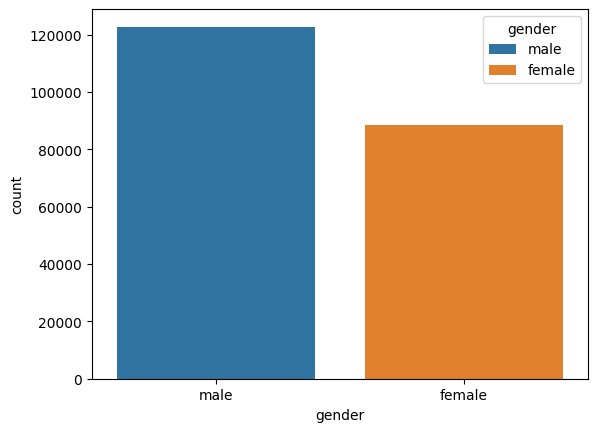

In [23]:
sns.countplot(
    month_df, x = 'gender', hue = 'gender',
)

[Text(0.5, 0, 'Total'), Text(0, 0.5, ''), Text(0.5, 1.0, 'Violation Types')]

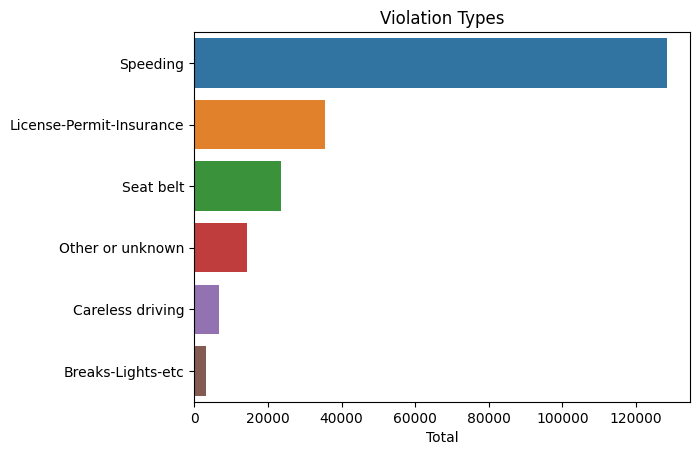

In [24]:
vdf = df.group_by('violation').agg(pl.count()).to_pandas().sort_values('count', ascending=False)
ax = sns.barplot(vdf, x = 'count', y = 'violation', hue = 'violation')
ax.set(
    xlabel='Total',
    ylabel='',
    title='Violation Types')
#plt.show()

[Text(0.5, 1.0, 'Violation Types  Relative Frequency'),
 Text(0.5, 0, 'Percentage'),
 Text(0, 0.5, '')]

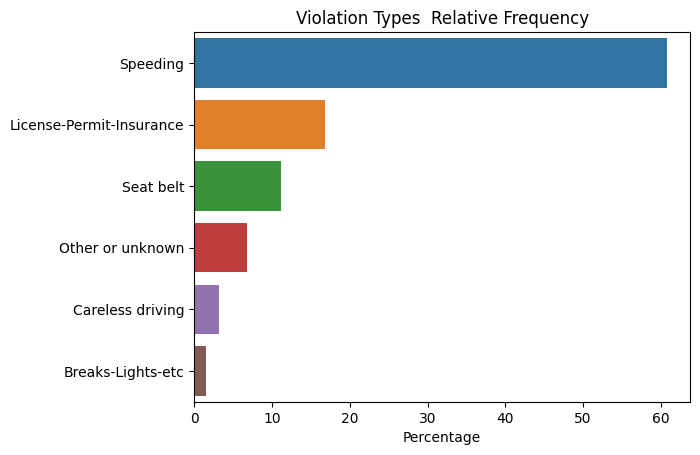

In [25]:
vpct = (df
 .group_by('violation')
 .agg([pl.count()])
 .sort('count', descending=True)
 .with_columns(
     (pl.col('count') * 100  /  pl.col('count').sum()).round(2).alias('pct'))
 )

ax = sns.barplot(vpct, x = 'pct', y  = 'violation', hue = 'violation')
ax.set(title='Violation Types  Relative Frequency', xlabel='Percentage', ylabel='')

[Text(0.5, 1.0, 'Violation By Gender')]

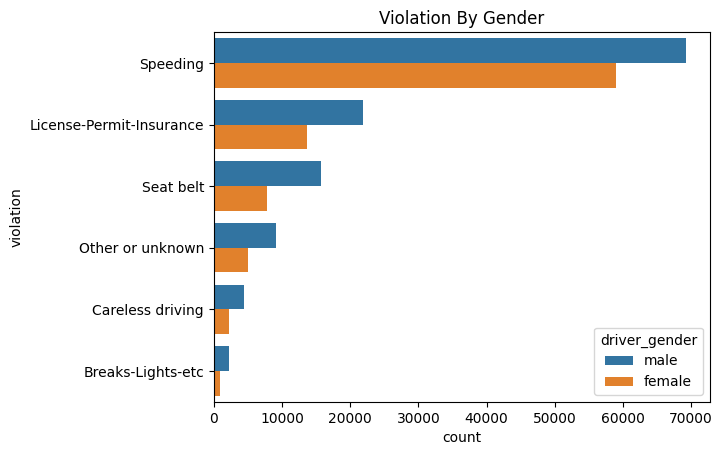

In [211]:
gv = (df
   .drop_nulls()
    .group_by(['violation', 'driver_gender'])
    .agg(pl.count())
    .sort('count', descending=True)
    )
ax = sns.barplot(gv, x = 'count', y = 'violation', hue = 'driver_gender')
ax.set(title='Violation By Gender')

### Grouping: Summarise

In [26]:
from polars import col
avg  = (df
 .filter(col('driver_gender').is_in(['male', 'female']))
 .group_by('violation')
 .agg(col('driver_age').mean().round(2).alias('avg_age'))
 .sort('avg_age', descending=True)
 )

fig = px.bar(avg, x='avg_age', y='violation')
fig.show()

In [37]:
#df.group_by(cs.string()).agg(cs.integer().sum())
(
    month_df
        .filter(col('driver_gender').is_in(['male', 'female']))
        .group_by('driver_gender')
        .agg(col('driver_age').mean().round(2))
)

driver_gender,driver_age
str,f64
"""male""",35.95
"""female""",34.39


In [39]:
(
    month_df
        .filter(col('driver_race').is_in(['Black', 'White']))
        .group_by('driver_race')
        .agg(col('driver_age').mean().round(2))
)

driver_race,driver_age
str,f64
"""White""",36.21
"""Black""",34.25


In [195]:
df

id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
str,date,str,str,str,str,date,str,str,i64,str
"""MS-2013-00001""",2013-01-01,"""Jones""","""28067""","""Mississippi Hi…","""male""",1950-06-14,"""Black""","""J042""",63,"""Seat belt"""
"""MS-2013-00002""",2013-01-01,"""Lauderdale""","""28075""","""Mississippi Hi…","""male""",1967-04-06,"""Black""","""B026""",46,"""Careless drivi…"
"""MS-2013-00003""",2013-01-01,"""Pike""","""28113""","""Mississippi Hi…","""male""",1974-04-15,"""Black""","""M009""",39,"""Speeding"""
"""MS-2013-00004""",2013-01-01,"""Hancock""","""28045""","""Mississippi Hi…","""male""",1981-03-23,"""White""","""K035""",32,"""Speeding"""
"""MS-2013-00005""",2013-01-01,"""Holmes""","""28051""","""Mississippi Hi…","""male""",1992-08-03,"""White""","""D028""",20,"""Speeding"""
"""MS-2013-00006""",2013-01-01,"""Jackson""","""28059""","""Mississippi Hi…","""female""",1960-05-02,"""White""","""K023""",53,"""Speeding"""
"""MS-2013-00007""",2013-01-01,"""Jackson""","""28059""","""Mississippi Hi…","""female""",1953-03-16,"""White""","""K032""",60,"""Speeding"""
"""MS-2013-00008""",2013-01-01,"""Grenada""","""28043""","""Mississippi Hi…","""female""",1993-06-14,"""White""","""D021""",20,"""Speeding"""
"""MS-2013-00009""",2013-01-01,"""Holmes""","""28051""","""Mississippi Hi…","""male""",1947-12-11,"""White""","""R021""",65,"""Speeding"""
